In [2]:
import urllib2
from bs4 import BeautifulSoup
import pandas as pd

In [1]:
# Get ratings and reviews

taj = "https://www.yelp.com/biz/costellos-ace-hardware-bethpage-bethpage-2?start=20"
Umall ="https://www.yelp.com/biz/costellos-ace-hardware-store-smithtown"
auto ="https://www.yelp.com/biz/costellos-ace-hardware-west-islip"

url2 = auto
start = 0
num_pages = 5
end = 20* num_pages

ratings =[]
reviews =[]

while (start < end):
    url = url2 + '?start=' + str(start)
    start +=20
    print url

    page = urllib2.urlopen(url)
    soup = BeautifulSoup(page)

    
    for reviewBody in soup.findAll('div',{"class":"review-content"}):
        ratings.append(reviewBody.div.div.div.get("title"))
        reviews.append(reviewBody.find('p').text)


In [8]:
df = pd.DataFrame()

df['rating']=ratings
df['review']=reviews

ratings1=[]
for rating in df['rating']:
    ratings1.append(int(rating[:1]))

df['rating']= ratings1
#df['rating']

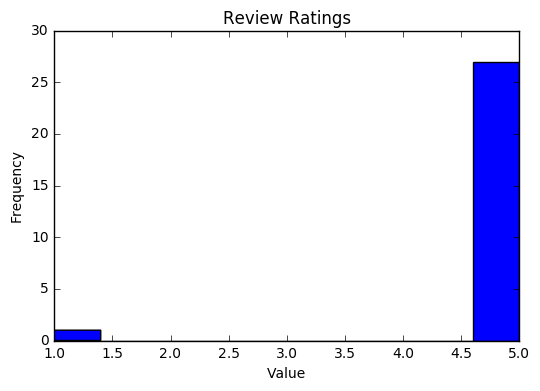

In [9]:
import matplotlib.pyplot as plt
from numpy.random import normal
plt.hist(ratings1)
plt.title("Review Ratings")
plt.xlabel("Value")
plt.ylabel("Frequency")
plt.show()